<a href="https://colab.research.google.com/github/naralakamsani/randomized_optimization/blob/main/randomized_optimization_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -q mlrose-hiive
!pip install -q joblib==1.1.1

#Imports

In [7]:
import mlrose_hiive

from google.colab import drive

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, f1_score, accuracy_score
import matplotlib.pyplot as plt

import time

#Data

[Hotel Reservation](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset?select=Hotel+Reservations.csv)


##Load Data

In [ ]:
!curl -o Hotel_Reservations.csv https://raw.githubusercontent.com/naralakamsani/supervised_learning/main/data/reservation_retention/Hotel%20Reservations.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3164k  100 3164k    0     0  12.0M      0 --:--:-- --:--:-- --:--:-- 12.1M


In [ ]:
df = pd.read_csv("Hotel_Reservations.csv")

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Encode Labeled Data

In [ ]:
df = df.drop(columns=["Booking_ID"])

df['booking_status'].replace('Not_Canceled', 0, inplace=True)
df['booking_status'].replace('Canceled', 1, inplace=True)

df['type_of_meal_plan'].replace('Not Selected', 0, inplace=True)
df['type_of_meal_plan'].replace('Meal Plan 1', 1, inplace=True)
df['type_of_meal_plan'].replace('Meal Plan 2', 2, inplace=True)
df['type_of_meal_plan'].replace('Meal Plan 3', 3, inplace=True)

df['room_type_reserved'].replace('Room_Type 1', 1, inplace=True)
df['room_type_reserved'].replace('Room_Type 2', 2, inplace=True)
df['room_type_reserved'].replace('Room_Type 3', 3, inplace=True)
df['room_type_reserved'].replace('Room_Type 4', 4, inplace=True)
df['room_type_reserved'].replace('Room_Type 5', 5, inplace=True)
df['room_type_reserved'].replace('Room_Type 6', 6, inplace=True)
df['room_type_reserved'].replace('Room_Type 7', 7, inplace=True)

df['market_segment_type'].replace('Offline', 0, inplace=True)
df['market_segment_type'].replace('Online', 1, inplace=True)
df['market_segment_type'].replace('Corporate', 2, inplace=True)
df['market_segment_type'].replace('Aviation', 3, inplace=True)
df['market_segment_type'].replace('Complementary', 4, inplace=True)

## Split Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['booking_status'],axis=1), df['booking_status'], test_size=0.2, random_state=1)

In [ ]:
print("Train data size:", len(x_train))
print("Test data size:", len(x_test))

Train data size: 29020
Test data size: 7255


## Scale Data

In [ ]:
x_train_not_scaled = x_train
x_test_not_scaled = x_test

scaler =  MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [ ]:
x_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.25,0.0,0.333333,0.176471,0.333333,0.0,0.0,0.259594,1.0,0.090909,0.866667,0.00,0.0,0.000000,0.000000,0.140741,0.0
1,0.50,0.0,0.333333,0.058824,0.666667,0.0,0.0,0.295711,0.0,0.636364,0.466667,0.00,0.0,0.000000,0.000000,0.175000,0.0
2,0.50,0.0,0.166667,0.000000,0.333333,0.0,0.5,0.036117,1.0,0.727273,0.833333,0.25,0.0,0.000000,0.000000,0.303704,0.0
3,0.50,0.0,0.333333,0.117647,0.666667,0.0,0.0,0.381490,1.0,0.272727,0.700000,0.00,0.0,0.000000,0.000000,0.196296,0.0
4,0.25,0.0,0.166667,0.000000,0.333333,1.0,0.0,0.011287,1.0,1.000000,0.133333,1.00,1.0,0.153846,0.137931,0.000000,0.2


#Functions

In [ ]:
def plot_loss_curve(title, estimator):
    plt.figure()
    plt.title(title)

    plt.xlabel("Iterations")
    plt.ylabel("Loss")

    plt.grid()

    plt.plot(estimator.fitness_curve[:,0])

    return plt

#Random Seed

In [ ]:
SEED = 0

# Gradient Descent

In [ ]:
gd_clf = MLPClassifier(random_state=1, hidden_layer_sizes=(50,), learning_rate_init=0.01)

In [ ]:
start_time = time.time()
gd_clf.fit(x_train, y_train)
end_time = time.time()
gd_train_time = end_time-start_time

In [ ]:
y_pred = gd_clf.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.69      0.78      4907
           1       0.57      0.85      0.68      2348

    accuracy                           0.74      7255
   macro avg       0.74      0.77      0.73      7255
weighted avg       0.80      0.74      0.75      7255



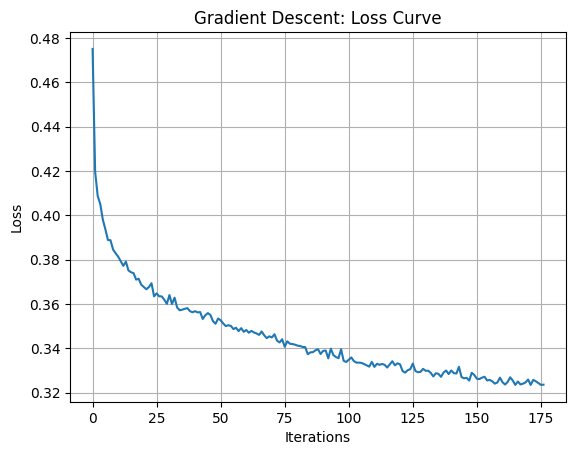

In [ ]:
plt.figure()
plt.title("Gradient Descent: Loss Curve")

plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.grid()

plt.plot(gd_clf.loss_curve_)

plt.show()

# Randomized Hill Climbing

In [ ]:
rhc_clf = mlrose_hiive.NeuralNetwork(hidden_nodes=[50,], activation='relu',
                           algorithm = 'random_hill_climb',early_stopping = True,
                           max_attempts = 100, max_iters = 2000,
                           bias = True, learning_rate = 10,
                           restarts=0, curve = True, random_state=SEED, clip_max=1e+10)

In [ ]:
start_time = time.time()
rhc_clf.fit(x_train, y_train)
end_time = time.time()
rhc_train_time = end_time-start_time

In [ ]:
y_pred = rhc_clf.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      4907
           1       0.65      0.65      0.65      2348

    accuracy                           0.77      7255
   macro avg       0.74      0.74      0.74      7255
weighted avg       0.77      0.77      0.77      7255



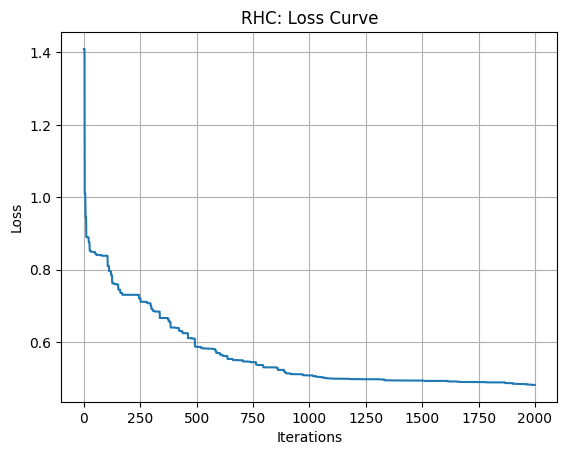

In [ ]:
plot_loss_curve("RHC: Loss Curve", rhc_clf)
plt.show()

# Simulated Annealing

In [ ]:
sa_clf = mlrose_hiive.NeuralNetwork(hidden_nodes=[50,], activation='relu',
                           algorithm = 'simulated_annealing',early_stopping = True,
                           max_attempts = 100, max_iters = 2000,
                           bias = True, learning_rate = 25,
                           restarts=0, curve = True, random_state=SEED, clip_max=1e+10)

In [ ]:
start_time = time.time()
sa_clf.fit(x_train, y_train)
end_time = time.time()
sa_train_time = end_time-start_time

In [ ]:
y_pred = sa_clf.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83      4907
           1       0.67      0.41      0.51      2348

    accuracy                           0.74      7255
   macro avg       0.72      0.66      0.67      7255
weighted avg       0.73      0.74      0.72      7255



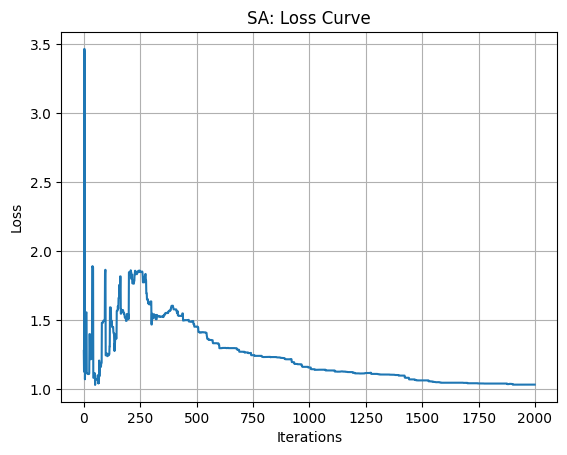

In [ ]:
plot_loss_curve("SA: Loss Curve", sa_clf)
plt.show()

# Genetic Algorithm

In [ ]:
ga_clf = mlrose_hiive.NeuralNetwork(hidden_nodes=[50,], activation='relu',
                           algorithm = 'genetic_alg',early_stopping = True,
                           max_attempts = 100, max_iters = 15,
                           bias = True, learning_rate = 5,
                           restarts=0, curve = True, random_state=SEED, clip_max=1e+10)

In [ ]:
start_time = time.time()
ga_clf.fit(x_train, y_train)
end_time = time.time()
ga_train_time = end_time-start_time

In [ ]:
y_pred = ga_clf.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82      4907
           1       0.63      0.37      0.47      2348

    accuracy                           0.73      7255
   macro avg       0.69      0.63      0.64      7255
weighted avg       0.71      0.73      0.70      7255



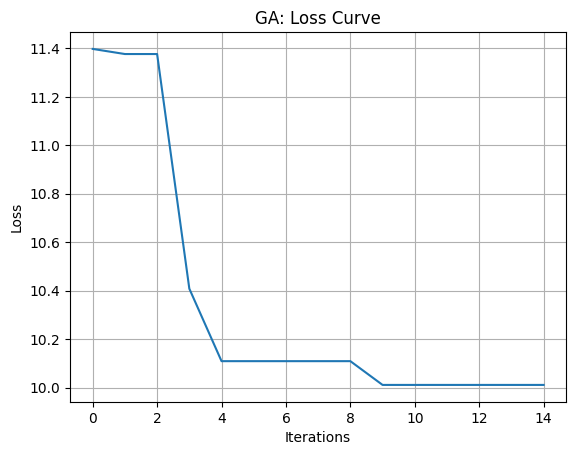

In [ ]:
plot_loss_curve("GA: Loss Curve", ga_clf)
plt.show()

# Algorithm Comparisons

2000


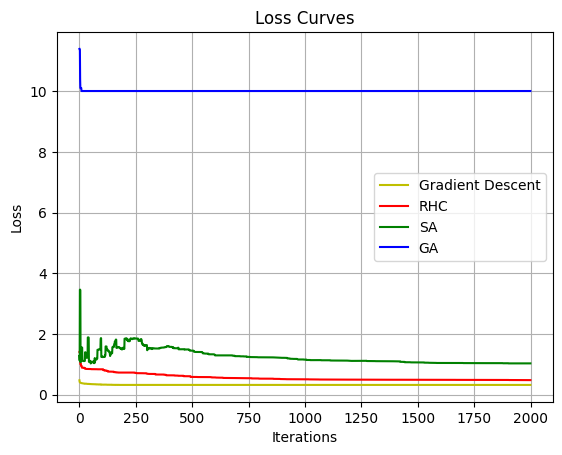

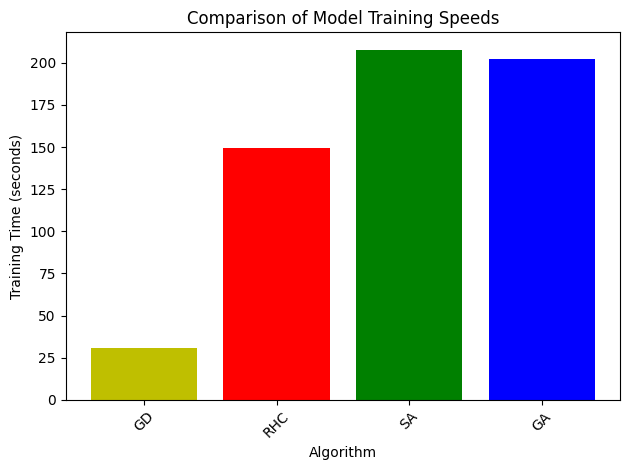

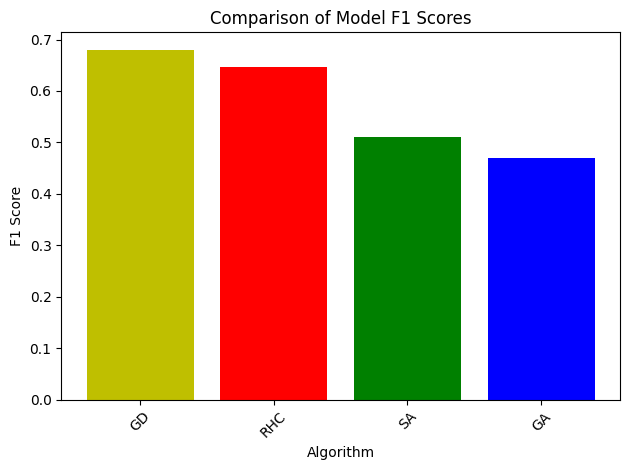

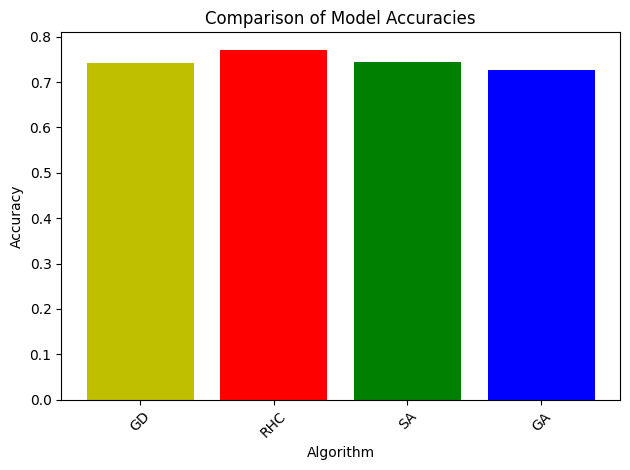

In [ ]:
algorithms = ['GD','RHC', 'SA', 'GA']

estimators = [gd_clf, rhc_clf, sa_clf, ga_clf]

training_times = [gd_train_time, rhc_train_time, sa_train_time, ga_train_time]

colors = ['y','r','g','b']

f1_scores = []
accuracies = []

for estimator in estimators:
  f1_scores.append(f1_score(y_test, estimator.predict(x_test)))
  accuracies.append(accuracy_score(y_test, estimator.predict(x_test)))


gd_curve = gd_clf.loss_curve_ + [gd_clf.loss_curve_[-1]] * (2000 - len(gd_clf.loss_curve_))
rhc_curve = rhc_clf.fitness_curve[:,0]
sa_curve = sa_clf.fitness_curve[:,0]
ga_curve = np.append(ga_clf.fitness_curve[:,0], [ga_clf.fitness_curve[:,0][-1]] * (2000 - len(ga_clf.fitness_curve[:,0])))

print(len(gd_clf.loss_curve_))

#Training Losses
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Loss Curves')

plt.plot(gd_curve, color="y", label="Gradient Descent")
plt.plot(rhc_curve, color="r", label="RHC")
plt.plot(sa_curve, color="g", label="SA")
plt.plot(ga_curve, color="b", label="GA")

plt.grid()

plt.legend(loc="best")

plt.show()

#Training Times
plt.bar(algorithms, training_times, color=colors)

plt.ylabel('Training Time (seconds)')
plt.xlabel('Algorithm')
plt.title('Comparison of Model Training Speeds')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#Testing F1 score
plt.bar(algorithms, f1_scores, color=colors)

plt.ylabel('F1 Score')
plt.xlabel('Algorithm')
plt.title('Comparison of Model F1 Scores')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#Testing Accuracy
plt.bar(algorithms, accuracies, color=colors)

plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()